In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id'], axis = 'columns')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

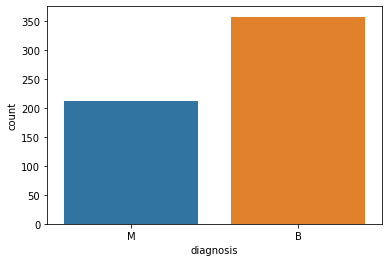

In [6]:
sns.countplot(x='diagnosis',data=df)

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Training and Test Split

In [8]:
x = df.drop('diagnosis',axis=1)

In [9]:
y = df[['diagnosis']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.75, random_state=42)

# Apply XGBoost Classifier

In [12]:
conda install -c conda-forge xgboost #Install XGBoost

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [13]:
from xgboost import XGBClassifier  #XGBoost Classifier

In [14]:
clf_xgb=XGBClassifier()

In [15]:
clf_xgb.fit(xtrain,ytrain)

[00:48:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
clf_xgb.score(xtest,ytest)

0.965034965034965

In [17]:
ypred=clf_xgb.predict(xtest)

In [18]:
ypred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [19]:
from sklearn.metrics import classification_report,accuracy_score,plot_roc_curve

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           B       0.97      0.98      0.97        89
           M       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [21]:
accuracy_score(ytest,ypred)

0.965034965034965

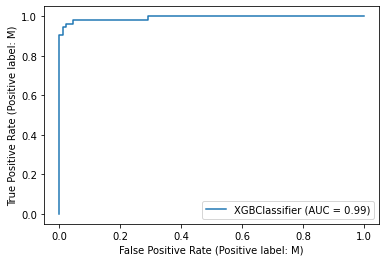

In [22]:
plot_roc_curve(clf_xgb,xtest,ytest)
plt.legend()

# Hyperparameter Tuning of XGBoost with GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}              #subsample and colsample_bytree to recommended values to speed things up and prevent overfitting.

In [25]:
xgb_grid_cv=GridSearchCV(estimator=clf_xgb,param_grid=param_grid,cv=3,n_jobs=-1, scoring='roc_auc')

In [26]:
xgb_grid_cv.fit(xtrain,ytrain)

[00:49:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [27]:
xgb_grid_cv_result=pd.DataFrame(xgb_grid_cv.cv_results_)

In [28]:
xgb_grid_cv_result # Grid Search Report

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195545,0.003396,0.013660,9.420104e-04,0.5,0,0.1,3,0,1,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.998291,0.977740,0.988552,0.988194,0.008394,38
1,0.199540,0.015786,0.021655,4.780869e-03,0.5,0,0.1,3,0,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.998077,0.973924,0.991308,0.987770,0.010173,70
2,0.197208,0.005181,0.012328,4.726629e-04,0.5,0,0.1,3,0,5,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.997222,0.976892,0.989824,0.987979,0.008402,57
3,0.201207,0.001247,0.010327,4.705840e-04,0.5,0,0.1,3,1,1,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.997863,0.976468,0.989612,0.987981,0.008810,53
4,0.200208,0.002493,0.010661,4.701907e-04,0.5,0,0.1,3,1,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.998291,0.979648,0.989188,0.989042,0.007611,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.283157,0.006646,0.009661,4.710896e-04,0.5,1,0.05,7,1,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.996795,0.977104,0.988976,0.987625,0.008095,86
320,0.277515,0.025705,0.009995,1.946680e-07,0.5,1,0.05,7,1,5,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.996795,0.975620,0.989188,0.987201,0.008758,125
321,0.237859,0.003550,0.009994,8.151722e-04,0.5,1,0.05,7,10,1,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.992308,0.976256,0.985796,0.984787,0.006592,237
322,0.291818,0.030575,0.010327,4.717076e-04,0.5,1,0.05,7,10,3,0.8,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.996581,0.975832,0.989400,0.987271,0.008604,121


In [29]:
xgb_grid_cv.best_score_

0.9891818976883636

In [30]:
xgb_grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [31]:
clf_xgb2=xgb_grid_cv.best_estimator_

In [32]:
clf_xgb2.fit(xtrain,ytrain)

[00:49:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [33]:
clf_xgb2.score(xtest,ytest)

0.9790209790209791

In [34]:
ypred=clf_xgb2.predict(xtest)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
accuracy_score(ytest,ypred)

0.9790209790209791

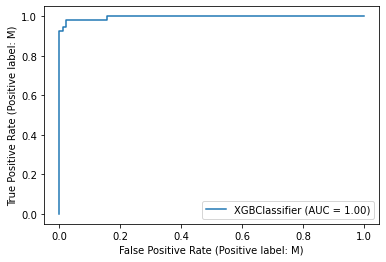

In [37]:
plot_roc_curve(clf_xgb2,xtest,ytest)

# Hyperparameter Tuning of XGBoost with Randomized Search CV

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}              #subsample and colsample_bytree to recommended values to speed things up and prevent overfitting.

In [40]:
xgb_ran_cv=RandomizedSearchCV(clf_xgb, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

In [41]:
xgb_ran_cv.fit(xtrain,ytrain)

[00:49:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5],
                                        'gamma': [0, 0.25, 1],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [3, 4, 5, 7],
                                        'reg_lambda': [0, 1, 10],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.8]},
                   scoring='roc_auc')

In [42]:
xgb_ran_cv.best_score_

0.9887595754460287

In [43]:
xgb_ran_cv.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 3,
 'reg_lambda': 0,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 0.5}

In [44]:
clf_xgb3=xgb_ran_cv.best_estimator_

In [45]:
clf_xgb3.fit(xtrain,ytrain)

[00:49:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=3,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
clf_xgb3.score(xtest,ytest)

0.958041958041958

In [47]:
ypred=clf_xgb3.predict(xtest)

In [48]:
accuracy_score(ytest,ypred)

0.958041958041958

In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           B       0.98      0.96      0.97        89
           M       0.93      0.96      0.95        54

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



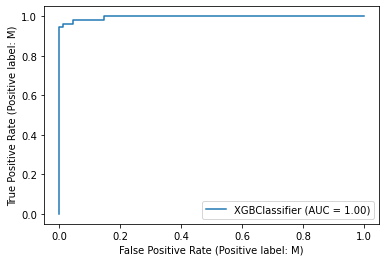

In [50]:
plot_roc_curve(clf_xgb3,xtest,ytest)